## Ventas vs fecha de expiración

In [15]:
import pandas as pd

# Load the dataset
file_path = './dairy_dataset.csv'
data = pd.read_csv(file_path)

# Seleccionar columnas relevantes
relevant_columns = [
    'Date',
    'Product ID', 
    'Product Name', 
    'Price per Unit', 
    'Price per Unit (sold)', 
    'Quantity Sold (liters/kg)', 
    'Quantity in Stock (liters/kg)', 
    'Expiration Date', 
    'Total Value'
]

# Filtrar el dataset
filtered_data = data[relevant_columns]

# Guardar el dataset filtrado (opcional)
filtered_data.to_csv('filtered_dairy_dataset.csv', index=False)

# Verificar el resultado
print(filtered_data.head())


# Display the first few rows and summary information about the dataset
data_info = filtered_data.info()
data_head = filtered_data.head()

data_info, data_head


         Date  Product ID Product Name  Price per Unit  Price per Unit (sold)  \
0  2022-02-17           5    Ice Cream           85.72                  82.24   
1  2021-12-01           1         Milk           42.61                  39.24   
2  2022-02-28           4       Yogurt           36.50                  33.81   
3  2019-06-09           3       Cheese           26.52                  28.92   
4  2020-12-14           8   Buttermilk           83.85                  83.07   

   Quantity Sold (liters/kg)  Quantity in Stock (liters/kg) Expiration Date  \
0                          7                            215      2022-01-21   
1                        558                            129      2021-10-25   
2                        256                            247      2022-02-13   
3                        601                            222      2019-07-26   
4                        145                              2      2020-10-28   

   Total Value  
0   19064.1280  
1   

(None,
          Date  Product ID Product Name  Price per Unit  Price per Unit (sold)  \
 0  2022-02-17           5    Ice Cream           85.72                  82.24   
 1  2021-12-01           1         Milk           42.61                  39.24   
 2  2022-02-28           4       Yogurt           36.50                  33.81   
 3  2019-06-09           3       Cheese           26.52                  28.92   
 4  2020-12-14           8   Buttermilk           83.85                  83.07   
 
    Quantity Sold (liters/kg)  Quantity in Stock (liters/kg) Expiration Date  \
 0                          7                            215      2022-01-21   
 1                        558                            129      2021-10-25   
 2                        256                            247      2022-02-13   
 3                        601                            222      2019-07-26   
 4                        145                              2      2020-10-28   
 
    Total Value  

In [16]:

# Asegúrate de cargar tu dataset y calcular 'Days to Expire'
filtered_data['Expiration Date'] = pd.to_datetime(filtered_data['Expiration Date'])
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data['Days to Expire'] = (filtered_data['Expiration Date'] - filtered_data['Date']).dt.days

/tmp/ipykernel_8328/2598063573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Expiration Date'] = pd.to_datetime(filtered_data['Expiration Date'])
/tmp/ipykernel_8328/2598063573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
/tmp/ipykernel_8328/2598063573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [17]:
# Trasladar los datos en el eje Days to Expire para que los valores sean positivos sin cambiar su distribución

# Calcular el valor necesario para trasladar todos los valores a positivos
shift_value = abs(filtered_data['Days to Expire'].min())

# Trasladar los valores
filtered_data['Days to Expire'] = filtered_data['Days to Expire'] + shift_value

# Verificar la transformación
print(filtered_data[['Expiration Date', 'Date', 'Days to Expire']].head())


  Expiration Date       Date  Days to Expire
0      2022-01-21 2022-02-17              32
1      2021-10-25 2021-12-01              22
2      2022-02-13 2022-02-28              44
3      2019-07-26 2019-06-09             106
4      2020-10-28 2020-12-14              12


/tmp/ipykernel_8328/1703774027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Days to Expire'] = filtered_data['Days to Expire'] + shift_value


In [18]:
# Guardar el dataset transformado en un nuevo archivo CSV
filtered_data.to_csv('processed_dairy_dataset.csv', index=False)

# Mensaje para confirmar que el archivo se guardó correctamente
print("El archivo 'processed_dairy_dataset.csv' ha sido guardado en el directorio actual.")


El archivo 'processed_dairy_dataset.csv' ha sido guardado en el directorio actual.


In [19]:
# Primera aproximación: 

import matplotlib.pyplot as plt
import seaborn as sns

# Crear scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Days to Expire', y='Quantity Sold (liters/kg)', alpha=0.6)
plt.title('Ventas vs. Días para Caducar')
plt.xlabel('Días para Caducar')
plt.ylabel('Cantidad Vendida (litros/kg)')
plt.grid(True)
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['Quantity (liters/kg)', 'Price per Unit', 'Quantity Sold (liters/kg)', 
                  'Price per Unit (sold)', 'Days to Expire', 'Quantity in Stock (liters/kg)']
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


ValueError: Could not interpret value `Days to Expire` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

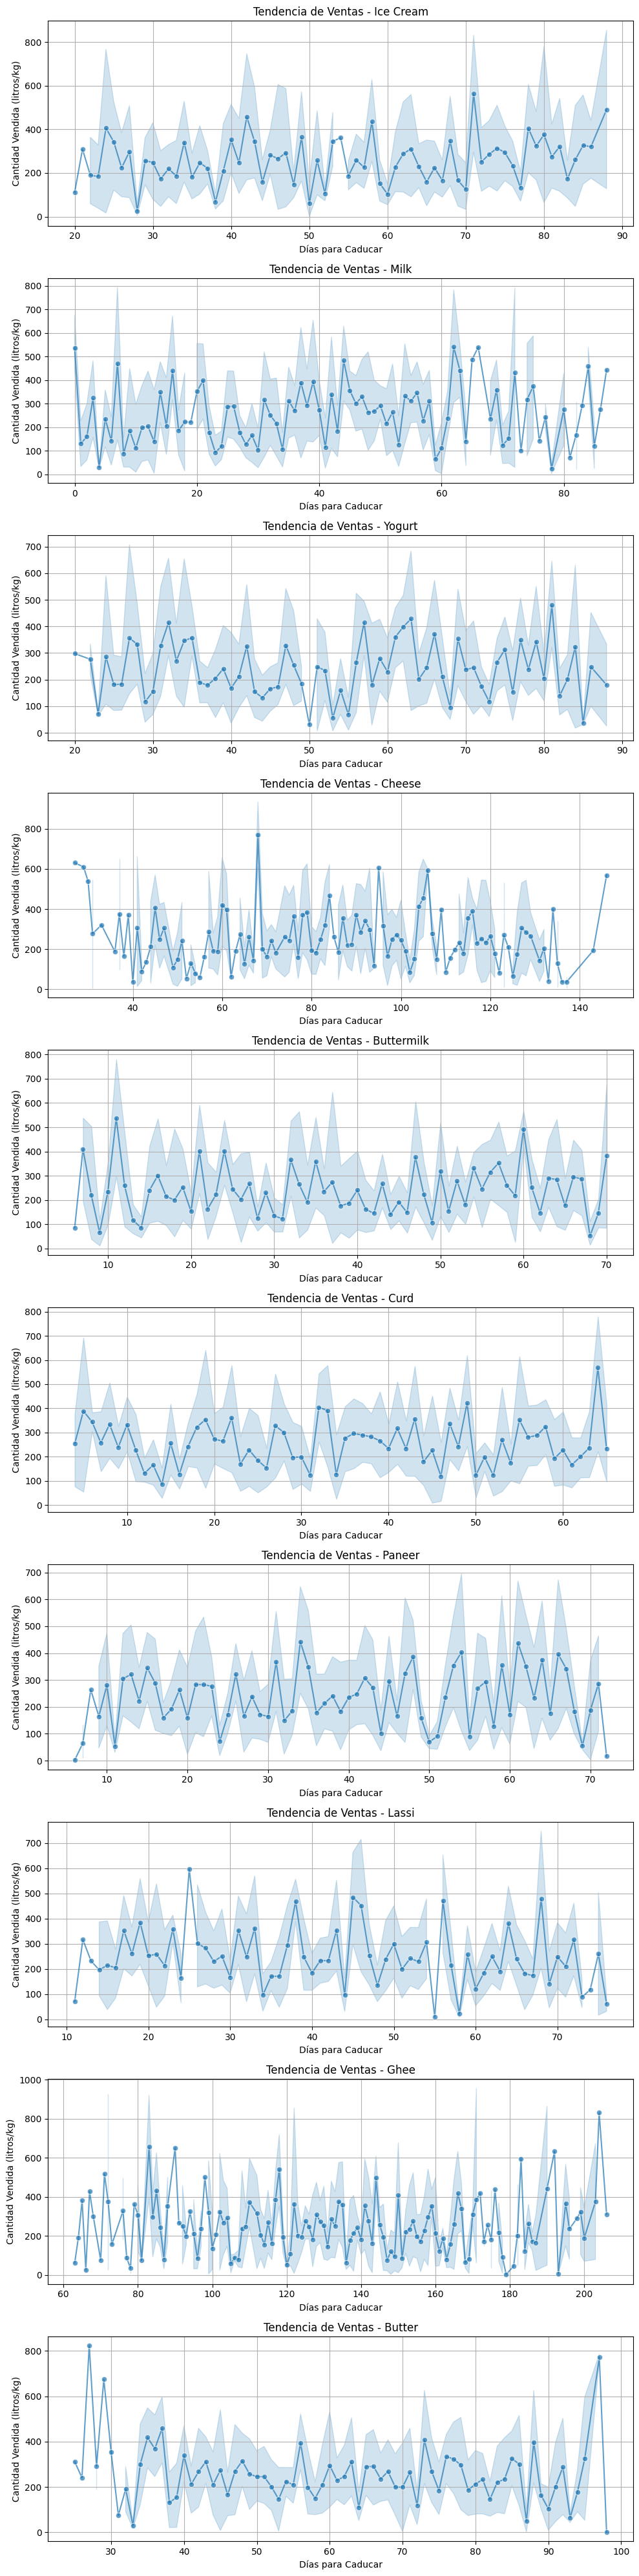

In [ ]:
# Frecuencia de ventas totales por fecha de expiración para cada categoría

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Obtener los nombres únicos de productos
unique_products = data['Product Name'].unique()

# Crear gráficas individuales
plt.figure(figsize=(10, len(unique_products) * 4))  # Ajustar altura dinámica según la cantidad de productos

for i, product in enumerate(unique_products):
    plt.subplot(len(unique_products), 1, i + 1)
    product_data = data[data['Product Name'] == product]
    sns.lineplot(data=product_data, x='Days to Expire', y='Quantity Sold (liters/kg)', marker='o', alpha=0.7)
    plt.title(f'Tendencia de Ventas - {product}')
    plt.xlabel('Días para Caducar')
    plt.ylabel('Cantidad Vendida (litros/kg)')
    plt.grid(True)

plt.tight_layout()
plt.show()


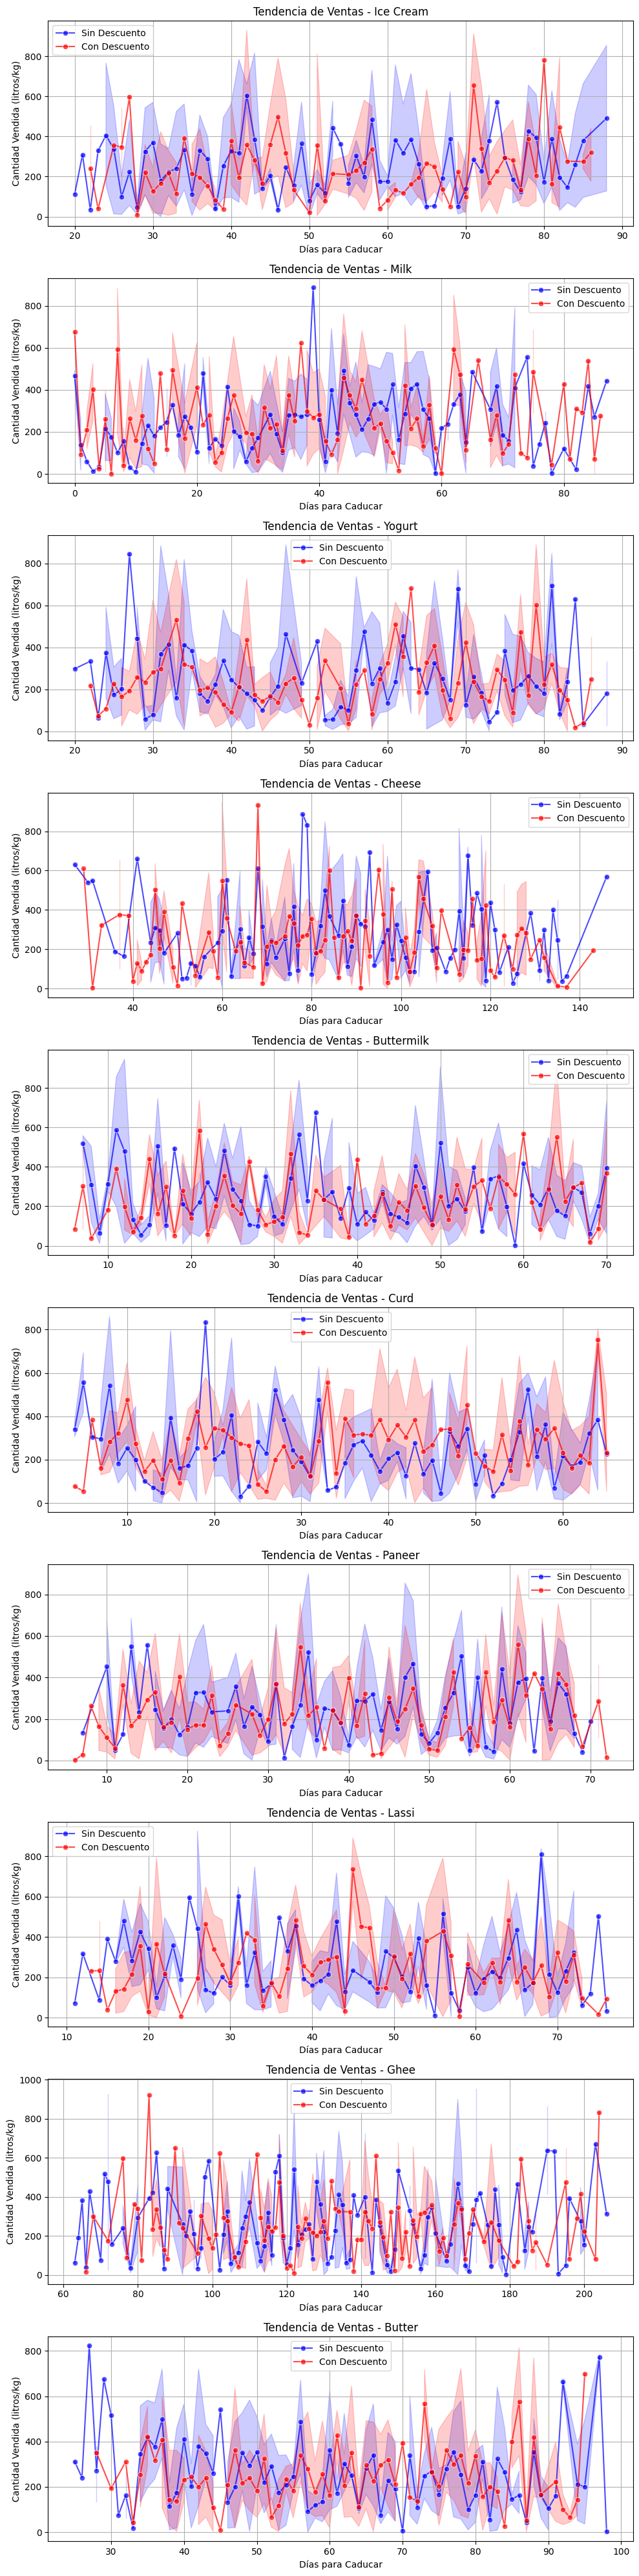

In [ ]:
# Frecuencia de ventas por fecha de expiración de productos con descuento vs sin descuento

# Crear una nueva columna para identificar si hubo descuento
data['Has Discount'] = data['Price per Unit'] > data['Price per Unit (sold)']

# Obtener los nombres únicos de productos
unique_products = data['Product Name'].unique()

# Crear gráficas individuales
plt.figure(figsize=(10, len(unique_products) * 4))  # Ajustar altura dinámica según la cantidad de productos

for i, product in enumerate(unique_products):
    plt.subplot(len(unique_products), 1, i + 1)
    product_data = data[data['Product Name'] == product]
    sns.lineplot(
        data=product_data[product_data['Has Discount'] == False],
        x='Days to Expire',
        y='Quantity Sold (liters/kg)',
        marker='o',
        color='blue',
        label='Sin Descuento',
        alpha=0.7
    )
    sns.lineplot(
        data=product_data[product_data['Has Discount'] == True],
        x='Days to Expire',
        y='Quantity Sold (liters/kg)',
        marker='o',
        color='red',
        label='Con Descuento',
        alpha=0.7
    )
    plt.title(f'Tendencia de Ventas - {product}')
    plt.xlabel('Días para Caducar')
    plt.ylabel('Cantidad Vendida (litros/kg)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Preparing data for modeling: Creating a target column for optimization
data['Total Revenue'] = data['Price per Unit (sold)'] * data['Quantity Sold (liters/kg)']

# Selecting features and target
features = data[['Price per Unit', 'Quantity in Stock (liters/kg)', 'Days to Expire']]
target = data['Total Revenue']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling (important for regression models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using a regression model (Random Forest) to predict optimal prices based on days and stock
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Regression Model:')
mse, r2


Regression Model:


(169947430.53202966, 0.1587782356009676)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Trying Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Trying Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Output results for comparison
{'Linear Regression': {'MSE': mse_linear, 'R2': r2_linear},
 'Gradient Boosting': {'MSE': mse_gb, 'R2': r2_gb}}


{'Linear Regression': {'MSE': 164816005.54667488, 'R2': 0.18417824527777094},
 'Gradient Boosting': {'MSE': 158566792.33101618, 'R2': 0.21511118819385344}}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Trying K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Trying Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Output results for comparison
{'KNN Regressor': {'MSE': mse_knn, 'R2': r2_knn},
 'Support Vector Regressor': {'MSE': mse_svr, 'R2': r2_svr}}


{'KNN Regressor': {'MSE': 181174816.57159942, 'R2': 0.10320386496041878},
 'Support Vector Regressor': {'MSE': 228286765.894245,
  'R2': -0.12999528968054785}}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Building a simple neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Training the model
history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate the model
nn_loss, nn_mae = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

{'Neural Network': {'MSE': nn_mse, 'R2': nn_r2, 'MAE': nn_mae}}


2025-01-12 13:38:59.718753: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-12 13:38:59.851757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736689139.904429    8328 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736689139.920403    8328 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 13:39:00.043097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


{'Neural Network': {'MSE': 165238007.06760272,
  'R2': 0.18208938248706774,
  'MAE': 9638.0361328125}}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Preparing data
# Assuming 'data' is already loaded and processed
# Create target column for optimization
data['Total Revenue'] = data['Price per Unit (sold)'] * data['Quantity Sold (liters/kg)']

# Selecting features and target
features = data[['Price per Unit', 'Quantity in Stock (liters/kg)', 'Days to Expire']]
target = data['Total Revenue']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models and results
results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
results['Polynomial Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
results['KNN Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results['Support Vector Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)
nn_loss, nn_mae = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'R2': r2_score(y_test, y_pred_nn),
    'MAE': nn_mae
}

# Output results
print('Model Performance Summary:')
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")


/home/reboot/anaconda3/envs/caducity_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model Performance Summary:
Random Forest: MSE=169947430.53202966, R2=0.1587782356009676
Linear Regression: MSE=164816005.54667488, R2=0.18417824527777094
Polynomial Regression: MSE=158688771.2232219, R2=0.2145074056088535
Gradient Boosting: MSE=158566792.33101618, R2=0.21511118819385344
KNN Regressor: MSE=181174816.57159942, R2=0.10320386496041878
Support Vector Regressor: MSE=228286765.894245, R2=-0.12999528968054785
Neural Network: MSE=165302709.7919344, R2=0.1817691108609929


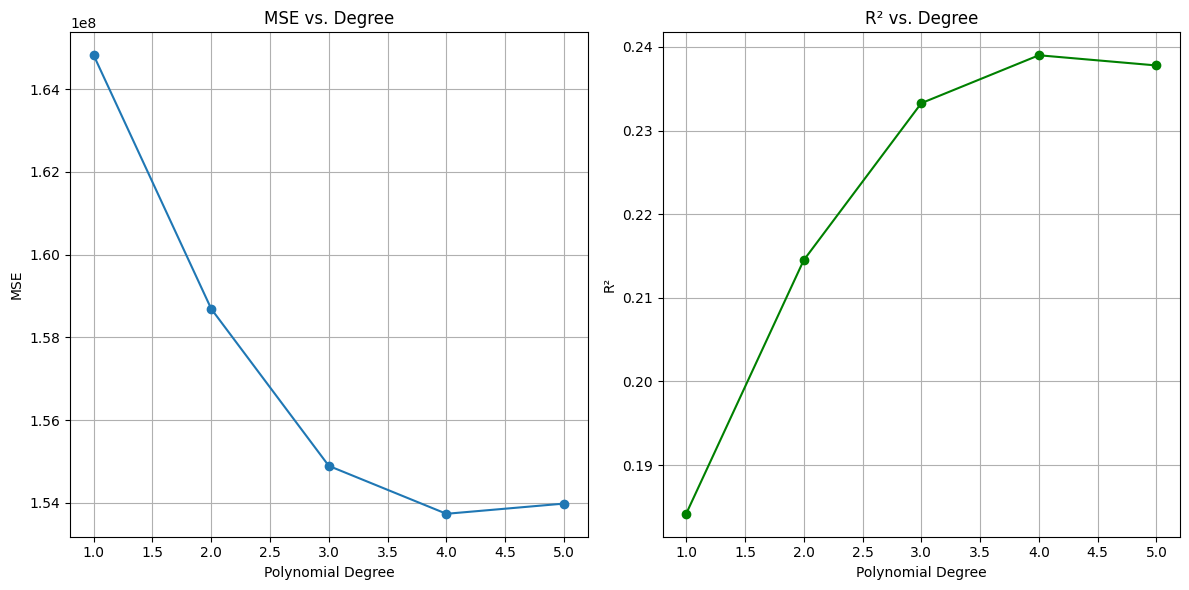

/home/reboot/anaconda3/envs/caducity_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model Performance Summary:
Random Forest: MSE=169947430.53202966, R2=0.1587782356009676
Linear Regression: MSE=164816005.54667488, R2=0.18417824527777094
Polynomial Regression (Best Degree) (Degree 4): MSE=153738664.34421727, R2=0.23900990988140414
Gradient Boosting: MSE=158566792.33101618, R2=0.21511118819385344
KNN Regressor: MSE=181174816.57159942, R2=0.10320386496041878
Support Vector Regressor: MSE=228286765.894245, R2=-0.12999528968054785
Neural Network: MSE=165210724.52345216, R2=0.18222442818829288


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Preparing data
# Assuming 'data' is already loaded and processed
# Create target column for optimization
data['Total Revenue'] = data['Price per Unit (sold)'] * data['Quantity Sold (liters/kg)']

# Selecting features and target
features = data[['Price per Unit', 'Quantity in Stock (liters/kg)', 'Days to Expire']]
target = data['Total Revenue']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models and results
results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

# Polynomial Regression
degrees = range(1, 6)  # Testing degrees from 1 to 5
poly_results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    poly_results[degree] = {
        'MSE': mean_squared_error(y_test, y_pred_poly),
        'R2': r2_score(y_test, y_pred_poly)
    }

# Find the best degree and add to results
best_degree = max(poly_results, key=lambda d: poly_results[d]['R2'])
results['Polynomial Regression (Best Degree)'] = {
    'Degree': best_degree,
    'MSE': poly_results[best_degree]['MSE'],
    'R2': poly_results[best_degree]['R2']
}

# Plotting Polynomial Regression Performance
mse_values = [metrics['MSE'] for metrics in poly_results.values()]
r2_values = [metrics['R2'] for metrics in poly_results.values()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o')
plt.title('MSE vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', color='green')
plt.title('R² vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.grid()

plt.tight_layout()
plt.show()

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
results['KNN Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results['Support Vector Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)
nn_loss, nn_mae = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'R2': r2_score(y_test, y_pred_nn),
    'MAE': nn_mae
}

# Output results
print('Model Performance Summary:')
for model, metrics in results.items():
    if 'Degree' in metrics:
        print(f"{model} (Degree {metrics['Degree']}): MSE={metrics['MSE']}, R2={metrics['R2']}")
    else:
        print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")


### Best models: Polynomial Regression & Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.optimize import minimize

# Preparing data
# Assuming 'data' is already loaded and processed
# Create target column for revenue prediction
data['Total Revenue'] = data['Price per Unit (sold)'] * data['Quantity Sold (liters/kg)']

# Selecting features and target for revenue prediction
features = data[['Price per Unit', 'Quantity in Stock (liters/kg)', 'Days to Expire']]
target_revenue = data['Total Revenue']

# Splitting the data
X_train, X_test, y_train_revenue, y_test_revenue = train_test_split(features, target_revenue, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting for Revenue Prediction
gb_revenue_model = GradientBoostingRegressor(random_state=42)
gb_revenue_model.fit(X_train_scaled, y_train_revenue)

# Polynomial Regression for Revenue Prediction
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_revenue_model = LinearRegression()
poly_revenue_model.fit(X_train_poly, y_train_revenue)

# Optimization function for maximizing revenue
def optimize_price(stock, days_to_expire, base_price, model, scaler, poly=None):
    # Ensure all inputs are float
    stock = float(stock)
    days_to_expire = float(days_to_expire)
    base_price = float(base_price)

    def revenue_function(price):
        # Ensure price is float and form a valid array
        price = float(price)
        input_data = np.array([[price, stock, days_to_expire]], dtype=float)
        input_scaled = scaler.transform(input_data)

        if poly:
            input_transformed = poly.transform(input_scaled)  # Apply polynomial transformation
            predicted_revenue = model.predict(input_transformed)[0]
        else:
            predicted_revenue = model.predict(input_scaled)[0]

        return -predicted_revenue  # Negative for maximization

    result = minimize(revenue_function, x0=base_price, bounds=[(0.01, base_price * 2)])
    optimal_price = result.x[0]
    return optimal_price

# Predictions and optimization for revenue
samples = [
    {'Price': 10.5, 'Stock': 50, 'Days to Expire': 5},
    {'Price': 7.2, 'Stock': 30, 'Days to Expire': 10}
]

for sample in samples:
    base_price = float(sample['Price'])
    stock = float(sample['Stock'])
    days_to_expire = float(sample['Days to Expire'])

    # Optimize price using Gradient Boosting
    optimal_price_gb = optimize_price(stock, days_to_expire, base_price, gb_revenue_model, scaler)

    # Optimize price using Polynomial Regression
    optimal_price_poly = optimize_price(stock, days_to_expire, base_price, poly_revenue_model, scaler, poly=poly)

    # Calculate discounts
    discount_gb = (base_price - optimal_price_gb) / base_price * 100
    discount_poly = (base_price - optimal_price_poly) / base_price * 100

    print(f"\nSample: Price={base_price}, Stock={stock}, Days to Expire={days_to_expire}\n")
    print(f"\n  Gradient Boosting Optimal Price: {optimal_price_gb:.2f}, Discount: {discount_gb:.2f}%")
    print(f"  Polynomial Regression Optimal Price: {optimal_price_poly:.2f}, Discount: {discount_poly:.2f}%\n")

# Output results
print('\nModel Performance Summary:\n')
results = {}

# Evaluate Gradient Boosting for Revenue
y_pred_gb_revenue = gb_revenue_model.predict(X_test_scaled)
results['\nGradient Boosting for Revenue'] = {
    'MSE': mean_squared_error(y_test_revenue, y_pred_gb_revenue),
    'R2': r2_score(y_test_revenue, y_pred_gb_revenue)
}

# Evaluate Polynomial Regression for Revenue
y_pred_poly_revenue = poly_revenue_model.predict(X_test_poly)
results['Polynomial Regression for Revenue'] = {
    'MSE': mean_squared_error(y_test_revenue, y_pred_poly_revenue),
    'R2': r2_score(y_test_revenue, y_pred_poly_revenue)
}

for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")

print('\n')



Sample: Price=10.5, Stock=50.0, Days to Expire=5.0


  Gradient Boosting Optimal Price: 10.50, Discount: 0.00%
  Polynomial Regression Optimal Price: 21.00, Discount: -100.00%


Sample: Price=7.2, Stock=30.0, Days to Expire=10.0


  Gradient Boosting Optimal Price: 7.20, Discount: 0.00%
  Polynomial Regression Optimal Price: 14.40, Discount: -100.00%


Model Performance Summary:


Gradient Boosting for Revenue: MSE=158566792.33101618, R2=0.21511118819385344
Polynomial Regression for Revenue: MSE=153738664.34421727, R2=0.23900990988140414




/tmp/ipykernel_8328/746146424.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = float(price)
/home/reboot/anaconda3/envs/caducity_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_8328/746146424.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  price = float(price)
/home/reboot/anaconda3/envs/caducity_env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
